Ridge regression is a regularization technique which also known as L2 regularization which adds the <b style = "color:orange">squared magnitude</b> of the coefficient as the penalty term to the loss function.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error

from sklearn.linear_model import Ridge

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = load_diabetes()

In [8]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

<b>data is a dictionary which contains keys as data and target.</b>

Calculating r2_score and Root Mean Squared Error on diabetes dataset by applying Linear Regression.

In [11]:
X = data.data
y = data.target

In [12]:
X.shape

(442, 10)

In [13]:
y.shape

(442,)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=0.2)

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.5188118914964637
48.72710829141399


Calculating r2_score and Root Mean Squared Error on diabetes dataset by applying Ridge Regression.

In [27]:
Rid = Ridge(alpha = 0.0001)   #Hyperparameter alpha.

In [28]:
"""
Slightly better performance than LinearRegression
"""
Rid.fit(X_train,y_train)
y_pred = Rid.predict(X_test)
print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5189738344370791
48.71890809371285


Applying Ridge Regression on generated data to see overfitting, underfitting.

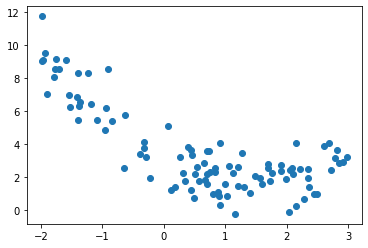

In [32]:
m = 100
x = 5 * np.random.rand(m,1) - 2
y = 0.7 * x**2 - 2*x + 3 + np.random.randn(m,1)

plt.scatter(x,y)
plt.show()

<b>numpy.argsort()</b> function is used to perform an <b style= "color:red">indirect sort</b> along the given axis using the algorithm specified by the <b>kind</b> keyword. It returns an array of indices of the same shape as arr that would sort the array.

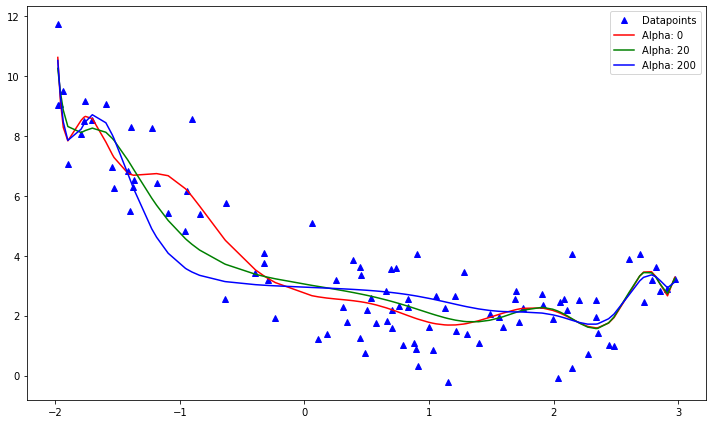

In [44]:
def ridge_curves(x,y,alpha):
    ridge_regression = Pipeline([
        ('poly_features',PolynomialFeatures(degree = 16)),
        ('ridge',Ridge(alpha = alpha))
    ])
    
    ridge_regression.fit(x,y)
    return ridge_regression.predict(x)

"""
Using 0 means not including regularization. Thus it will try to overfit.
Using 200 means regularization is too small. Thus it will try to underfit.
Using 20 is optimal for our case.
"""

"""
say m = 2, and m2 = 4, thus multiplying with alphas gives 0,80,800, which are errors
added to the original cost function. As 800 is way more erroneous than 80, thus having this
will underfit the model. And for a
"""
alphas = [0,20,200]  
cs = ['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x,y,'b^',label = 'Datapoints')

for alpha,c in zip(alphas,cs):
    pred = ridge_curves(x,y,alpha)
    plt.plot(sorted(x[:,0]),pred[np.argsort(x[:,0])],c,label = 'Alpha: {}'.format(alpha))
    #If the data is not sorted than the graph will look disasterous.
plt.legend()
plt.tight_layout()
plt.show()

array([[-1.97845953],
       [ 2.20855932],
       [ 1.30292495],
       [-0.32827992],
       [ 0.91359632],
       [ 1.1265565 ],
       [-0.94477534],
       [ 1.27913229],
       [ 1.754405  ],
       [ 0.87999072],
       [ 2.72304759],
       [-1.37316823],
       [-1.41907595],
       [ 1.70012096],
       [-1.59405444],
       [ 2.60655096],
       [-1.18675525],
       [ 2.1507695 ],
       [-0.84157348],
       [ 0.83075067],
       [ 0.11119195],
       [ 2.35529448],
       [ 0.31169794],
       [ 1.00018466],
       [ 1.99342513],
       [-1.52840304],
       [-0.23305502],
       [-0.63317427],
       [-0.95511117],
       [ 0.8296442 ],
       [-1.22603488],
       [-1.75840285],
       [ 2.69200541],
       [ 1.05702   ],
       [ 0.39309755],
       [ 2.85579272],
       [ 0.69522992],
       [ 1.15249578],
       [-1.89929158],
       [ 0.79471467],
       [ 2.34400756],
       [-0.64042435],
       [ 0.8932446 ],
       [ 0.17846138],
       [ 1.21445169],
       [ 2

In [48]:
np.argsort(x[:,0])

array([81,  0, 93, 88, 38, 56, 74, 31, 55, 14, 80, 25, 12, 52, 95, 11, 91,
       30, 16, 70, 28,  6, 98, 18, 41, 27, 53,  3, 48, 61, 26, 66, 20, 43,
       46, 22, 62, 34, 77, 99, 49, 94, 71, 83, 84, 79, 90, 36, 69, 87, 96,
       78, 39, 29, 19,  9, 42, 67,  4, 23, 54, 33,  5, 37, 76, 44,  7,  2,
       82, 64, 51, 86, 68, 13, 59,  8, 73, 47, 24, 60, 58, 63, 89, 50, 17,
        1, 65, 75, 40, 21, 97, 72, 15, 32, 10, 57, 85, 35, 45, 92],
      dtype=int64)